<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/2.-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

x1,x2,y,x3 = np.loadtxt("https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/life-expectancy-without-country-names.txt",skiprows=1, unpack=True, dtype=np.float64)
bias=np.ones(x1.size, dtype=np.float64)
X = np.column_stack((bias,x1, x2, x3))
Y = y.reshape(-1, 1)
print(f"Xshape={X.shape} yshape={y.shape} Yshape={Y.shape}")


Xshape=(167, 4) yshape=(167,) Yshape=(167, 1)


In [ ]:
print(f"x={X.dtype} y={Y.dtype} ")

x=float64 y=float64 


In [ ]:
def predict(X,w):
  return np.matmul(X,w)

In [ ]:
def gradient(X,Y,w):
  error=predict(X,w) - Y
  return 2 * np.matmul(X.T, (error)) / X.shape[0]

In [ ]:
def loss(X, Y, w):
  return np.average((predict(X,w) - Y) ** 2)

In [ ]:
def train(X,Y, iterations, lr):
  w=np.zeros((X.shape[1], 1), dtype=np.float64)
  for i in range(iterations):
    print(f"iteration {i} => loss {loss(X,Y,w)}")
    w -= gradient(X, Y, w) * lr
  return w

In [ ]:
w = train(X,Y, iterations=100_000, lr=0.00001)

Streaming output truncated to the last 5000 lines.
iteration 95000 => loss 89.81488688297034
iteration 95001 => loss 89.81488647244653
iteration 95002 => loss 89.81488606192286
iteration 95003 => loss 89.81488565139934
iteration 95004 => loss 89.81488524087602
iteration 95005 => loss 89.81488483035282
iteration 95006 => loss 89.81488441982982
iteration 95007 => loss 89.81488400930695
iteration 95008 => loss 89.81488359878425
iteration 95009 => loss 89.8148831882617
iteration 95010 => loss 89.81488277773933
iteration 95011 => loss 89.81488236721707
iteration 95012 => loss 89.81488195669503
iteration 95013 => loss 89.8148815461731
iteration 95014 => loss 89.81488113565135
iteration 95015 => loss 89.81488072512975
iteration 95016 => loss 89.81488031460832
iteration 95017 => loss 89.81487990408701
iteration 95018 => loss 89.81487949356593
iteration 95019 => loss 89.81487908304497
iteration 95020 => loss 89.81487867252419
iteration 95021 => loss 89.81487826200352
iteration 95022 => loss 89.

In [ ]:
print(f"weights:{w.T}")
print(f"Water rate Predictions:")
pdWeights = []
for i in range(5):
  prediction={}
  prediction["prediction"] = predict(X[i], w)[0]
  prediction["label"] =Y[i][0]
  print(f"X[{i}] -> {prediction.get('prediction')} (label:{prediction['label']})")
  pdWeights.append(prediction)

weights:[[-0.1875818   0.01348184  0.3832428   1.20873732]]
Water rate Predictions:
X[0] -> 93.99963566222998 (label:98.9)
X[1] -> 91.62240044304467 (label:100.0)
X[2] -> 103.29556359688088 (label:100.0)
X[3] -> 102.53864305397047 (label:100.0)
X[4] -> 89.29091820795023 (label:86.2)


In [ ]:
import pandas as pd
df = pd.DataFrame(pdWeights)
df

,prediction,label
0,93.999636,98.9
1,91.622400,100.0
2,103.295564,100.0
3,102.538643,100.0
4,89.290918,86.2


In [ ]:
import pandas as pd
df = pd.DataFrame(w.reshape(1,4), columns=["bias", "Pollution","Healthcare","Life expectancy"])
df

,bias,Pollution,Healthcare,Life expectancy
0,-0.187582,0.013482,0.383243,1.208737


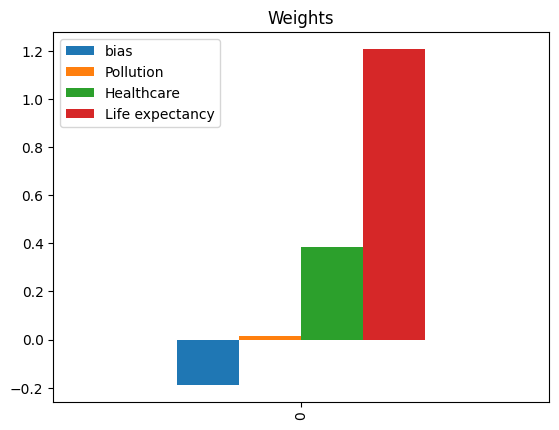

In [ ]:
import matplotlib.pyplot as plt

df.plot(kind="bar")
plt.title("Weights")
plt.show()